In [1]:
# Necessary imports
%load_ext autoreload
%autoreload 2

import networkx as nx
import numpy as np
import pandas as pd
import scipy.sparse as sps

from TCGAMultiOmics.multiomics import MultiOmicsData
from moge.visualization.plot_data import matrix_heatmap, plot_coo_matrix

import seaborn
import matplotlib.pyplot as plt
from moge.network.omics_distance import *


# Import the TCGA cancer data

In [2]:
import pickle
with open('moge/data/luad_data.pickle', 'rb') as file:
    luad_data = pickle.load(file)

In [2]:
folder_path = "/home/jonny/PycharmProjects/Bioinformatics_ExternalData/tcga-assembler/LUAD/"
external_data_path = "/home/jonny/PycharmProjects/Bioinformatics_ExternalData/"
luad_data = MultiOmicsData(cancer_type="LUAD", tcga_data_path=folder_path, external_data_path=external_data_path,
                           modalities=[\
                                       "GE",
                                       "MIR",
                                       "LNC",
                                       # "CNV",
                                       # "SNP",
#                                        "PRO",
                                       # "DNA"
                                       ])

/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand',
       'frame', 'gene_id', 'gene_type', 'gene_name', 'level', 'tag',
       'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name',
       'transcript_support_level', 'havana_transcript', 'exon_number',
       'exon_id', 'ont'],
      dtype='object')
Unmatched lncRNAs 12727
Unmatched lncRNAs after lncBase: 10165
Unmatched lncRNAs after gencode: 812
Unmatched lncRNAs after HGNC: 758
Unmatched lncRNAs after lncipedia: 622
PATIENTS (522, 110)
DRUGS (461, 4)
GE (576, 20163)
MIR (494, 1870)
LNC (546, 12727)
SAMPLES (599, 111)
Processed genes info for  GE
Processed genes info for  MIR
Processed genes info for  LNC


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/TCGAMultiOmics/genomic.py:859: FutureWarning: 'MiRBase ID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  self.gene_info = self.gene_info.join(self.targetScan_family_df.groupby("MiRBase ID").first(), on="MiRBase ID",how="left")


In [3]:
LNC = luad_data.LNC.get_genes_info()
MIR = luad_data.MIR.get_genes_info()
GE = luad_data.GE.get_genes_info()
print(GE.columns)
print(MIR.columns)
print(LNC.columns)

Index(['Transcript ID', 'Gene ID', 'Gene description', '3P-seq tags',
       'locus_type', 'location', 'gene_family', 'gene_family_id',
       'Transcript sequence', 'Disease association', 'Chromosome',
       'Chromosome arm', 'Chromosome region', 'Transcript length'],
      dtype='object')
Index(['miR family', 'Seed+m8', 'Transcript sequence', 'Family Conservation?',
       'MiRBase Accession', 'MiRBase ID', 'location', 'ensembl_gene_id',
       'Disease association', 'locus_type', 'Transcript length', 'GO Terms',
       'Rfams'],
      dtype='object')
Index(['Gene ID', 'Gene Name', 'HGNC Gene Name', 'Transcript id',
       'Transcript name', 'Transcript type', 'tag', 'Chromosome', 'start',
       'end', 'Strand', 'locus_type', 'Transcript sequence',
       'Disease association', 'GO Terms', 'Rfams'],
      dtype='object')


In [8]:
node_list = LNC[LNC["Family"].notnull()].index[0:1000]
# node_list = LNC.index
correlation_dist = compute_expression_correlation_dists(luad_data, modalities=["LNC"],
                                                                    node_list=node_list, absolute_corr=True,
                                                                    squareform=False)
affinity = compute_annotation_affinities(LNC, node_list=node_list,
#                 features=["GO Terms", "Rfams", "Disease association"], 
               features=["Family", "tag", "Strand", "Chromosome"], 
                                         correlation_dist=correlation_dist,
                nanmean=False, weights=[1, 1, 0.5, 0.5, 5])


Gower's dissimilarity: Computing Family , dtype: object , shape: (1000,)
Dice distance
Gower's dissimilarity: Computing tag , dtype: object , shape: (1000,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Gower's dissimilarity: Computing Strand , dtype: object , shape: (1000,)
Dice distance
Gower's dissimilarity: Computing Chromosome , dtype: object , shape: (1000,)
Dice distance
Correlation distance (499500,)


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


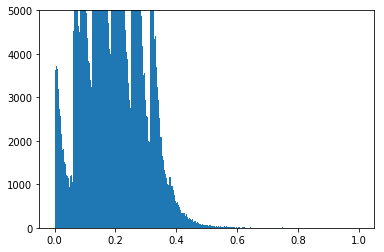

In [9]:
plt.hist(affinity[np.where(~np.isnan(affinity))].reshape((-1)), bins=500)
plt.ylim(top=5000)
plt.show()

In [10]:
threshold=0.6
print("threshold at", threshold,":",(affinity > threshold).sum())
# print("threshold at", threshold,":",(affinity < 0.01).sum())

threshold at 0.6 : 406


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


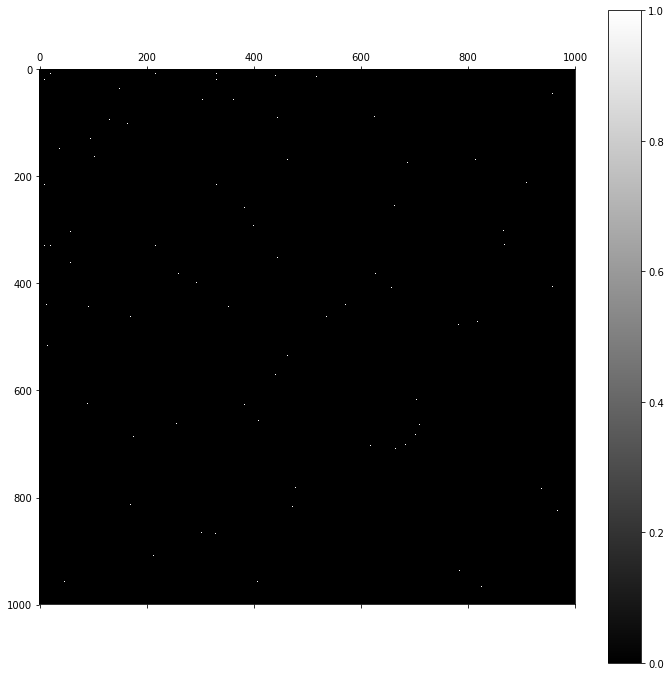

In [11]:
matrix_heatmap(np.array(affinity>threshold, dtype=float))

In [46]:
LNC

,Gene ID,Gene Name,HGNC Gene Name,Transcript id,Transcript name,Transcript type,tag,Chromosome,start,end,Strand,Transcript sequence,Disease association,GO Terms,Rfams,locus_type
ENSG00000005206,ENSG00000005206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RNA, long non-coding"
ENSG00000031544,ENSG00000031544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RNA, long non-coding"
AC000111.6,ENSG00000083622,AC000111.6,NaN,ENST00000456270,AC000111.6-001,antisense,basic,chr7,117604791.0,117604989.0,-,[TGAAAACTTCCTGAGGCCTCCTCAGAAGCAGATGCTGCTATGCTT...,NaN,NaN,NaN,"RNA, long non-coding"
ENSG00000088970,ENSG00000088970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RNA, long non-coding"
IGF2AS,ENSG00000099869,IGF2AS,IGF2-AS,ENST00000445504|ENST00000381361|ENST00000381363,AC132217.6-002|AC132217.6-001|AC132217.6-003,antisense,basic,chr11,2146245.0,2147807.0,+,[TCCCGGCGGAGTCCTAGGCCCGCGGGCTAGAGGCACTTTACCGCC...,NaN,NaN,NaN,"RNA, long non-coding"
ENSG00000100181,ENSG00000100181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RNA, long non-coding"
ENSG00000104691,ENSG00000104691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RNA, long non-coding"
ENSG00000110347,ENSG00000110347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RNA, long non-coding"
RP11-153K16.2,ENSG00000115934,RP11-153K16.2,NaN,ENST00000538297,RP11-153K16.2-001,lincRNA,basic,chr12,23181334.0,23182623.0,-,[CCCGCCATGATCGTGAGGCCTCCCCAGCGATGTGGAACTGCTGGA...,NaN,NaN,NaN,"RNA, long non-coding"
RP11-401M16.7,ENSG00000117242,RP11-401M16.7,PINK1-AS,ENST00000451424,RP11-401M16.7-001,antisense,overlapping_locus|basic,chr1,20642657.0,20643118.0,-,[ACTTTGAATTGCTAAAAGTGGCATTTTTCCTATGTGCAGTCACTC...,NaN,NaN,NaN,"RNA, long non-coding"


In [18]:
import wget
for gene in luad_data.LNC.get_genes_list():
    wget.download("http://starbase.sysu.edu.cn/moduleDownload.php?source=rnaRNA&type=xls&value=hg19;"+gene+";1;1", 
              out="/home/jonny/PycharmProjects/Bioinformatics_ExternalData/StarBase v2.0/lncrna_rna_interactions")
    

In [19]:
import os
tables = []
starbase_rna_rna_interaction_folder_path = "/home/jonny/PycharmProjects/Bioinformatics_ExternalData/StarBase v2.0/lncrna_rna_interactions/"
for filename in os.listdir(starbase_rna_rna_interaction_folder_path):
    if filename.endswith(".xls"):
        table_i = pd.read_table(os.path.join(starbase_rna_rna_interaction_folder_path, filename), comment="#")
        if table_i.loc[0, "geneID"] != 'No Available results.':
            tables.append(table_i)

table = pd.concat(tables, join="inner")
table

,geneID,geneName,geneType,pairGeneID,pairGeneName,pairGeneType,interactionNum,expNum,seqTypeNum,totalReadsNum,FreeEnergy,AlignScore(Smith-Waterman)
0,ENSG00000237604,AP001056.1,lincRNA,ENSG00000173674,EIF1AX,protein_coding,1,1,1,1,-21.80,19.0
1,ENSG00000237604,AP001056.1,lincRNA,ENSG00000272060.1,RNA18S5,rRNA,1,1,1,2,-26.60,13.5
2,ENSG00000237604,AP001056.1,lincRNA,Entrez100008588,RNA18N5,rRNA,4,1,1,5,-61.90,19.5
0,ENSG00000213468,FIRRE,lincRNA,ENSG00000014641,MDH1,protein_coding,1,1,1,3,-37.90,32.0
1,ENSG00000213468,FIRRE,lincRNA,ENSG00000015479,MATR3,protein_coding,1,1,1,2,-15.90,20.0
2,ENSG00000213468,FIRRE,lincRNA,ENSG00000026559,KCNG1,protein_coding,1,1,1,1,-10.90,14.0
3,ENSG00000213468,FIRRE,lincRNA,ENSG00000083937,CHMP2B,protein_coding,1,1,1,1,-22.30,19.0
4,ENSG00000213468,FIRRE,lincRNA,ENSG00000089597,GANAB,protein_coding,1,1,1,1,-31.00,23.5
5,ENSG00000213468,FIRRE,lincRNA,ENSG00000100426,ZBED4,protein_coding,1,1,1,1,-21.10,20.0
6,ENSG00000213468,FIRRE,lincRNA,ENSG00000104687,GSR,protein_coding,1,1,1,1,-11.80,11.5


In [22]:
table["geneName"].unique().shape

(359,)

In [20]:
# table.to_csv("/home/jonny/PycharmProjects/Bioinformatics_ExternalData/StarBase v2.0/starbase_3.0_lncrna_rna_interactions.csv")

# Heterogeneous Network

In [4]:
from moge.network.heterogeneous_network import HeterogeneousNetwork

network = HeterogeneousNetwork(modalities=["MIR", "GE", "LNC"], multi_omics_data=luad_data)

MIR  nodes: 1870
GE  nodes: 20163
LNC  nodes: 12644
Total nodes: 34677
Genes info columns: ['locus_type', 'Transcript sequence', 'Disease association', 'Family']
Number of nodes without seq removed: 2145
Total nodes (filtered): 32533


## Write node labels to file

In [7]:
# READ Edgeslist
network.import_edgelist_file(file="lncRNA-miRNA-mRNA_new-08-14.edgelist", 
                             is_directed=True)

In [4]:
from moge.network.file_io import write_node_labels_to_file

# write_node_labels_to_file("moge/data/lncRNA_miRNA_mRNA/lncRNA-miRNA-mRNA_node_labels_family.tsv", luad_data, 
#                           label_cols=["family"],
#                           modalities=["MIR", "GE", "LNC"], 
#                           get_dummies=False)

# write_node_labels_to_file("moge/data/lncRNA_miRNA_mRNA/lncRNA-miRNA-mRNA_node_labels_disease_dummies.tsv", luad_data, 
#                           label_cols=["Disease association"],
#                           modalities=["MIR", "GE", "LNC"], remove_na=True, sep="\t",
#                           get_dummies=True)

# Add Attribute Affinity Positive Edges

In [5]:
affinities_GE = network.add_edges_from_nodes_similarity(modality="GE", node_list=network.nodes["GE"], 
                                        similarity_threshold=0.70, dissimilarity_threshold=0.01,
                                        negative_sampling_ratio=5.0, nanmean=False,
                                        features=["locus_type", "gene_family_id", "Disease association"], 
                                        compute_correlation=False)

Gower's dissimilarity: Computing locus_type , dtype: object , shape: (20163,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Gower's dissimilarity: Computing gene_family_id , dtype: object , shape: (20163,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Gower's dissimilarity: Computing Disease association , dtype: object , shape: (20163,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


1999 undirected positive edges (type='u') added.
9995 undirected negative edges (type='u_n') added.


In [12]:
affinities_MIR = network.add_edges_from_nodes_similarity(modality="MIR", node_list=network.nodes["MIR"], 
                                        similarity_threshold=0.70, dissimilarity_threshold=0.01,
                                        negative_sampling_ratio=5.0, nanmean=True,
                                        features=["Family", "GO Terms", "Rfams", "Disease association"], 
                                        compute_correlation=False)

Gower's dissimilarity: Computing Family , dtype: object , shape: (1870,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Gower's dissimilarity: Computing GO Terms , dtype: object , shape: (1870,)
Dice distance
Gower's dissimilarity: Computing Rfams , dtype: object , shape: (1870,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Gower's dissimilarity: Computing Disease association , dtype: object , shape: (1870,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/home/jonny/PycharmProjects/MultiOmicsGraphEmbedding/moge/network/omics_distance.py:53: RuntimeWarning: Mean of empty slice
  agg_func = lambda x: np.nanmean(x, axis=0)


405 undirected positive edges (type='u') added.
2025 undirected negative edges (type='u_n') added.


In [7]:
affinities_LNC = network.add_edges_from_nodes_similarity(modality="LNC", node_list=network.nodes["LNC"], 
                                        similarity_threshold=0.70, dissimilarity_threshold=0.3,
                                        negative_sampling_ratio=5.0, 
                                        nanmean=False,
                                        features=["locus_type", "Transcript type", "tag", "Strand", "Chromosome"],
                                        weights=[1, 1, 1, 0.5, 0.5, 5],
                                        compute_correlation=True)

Gower's dissimilarity: Computing locus_type , dtype: object , shape: (12644,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Gower's dissimilarity: Computing Transcript type , dtype: object , shape: (12644,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Gower's dissimilarity: Computing tag , dtype: object , shape: (12644,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Gower's dissimilarity: Computing Strand , dtype: object , shape: (12644,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Gower's dissimilarity: Computing Chromosome , dtype: object , shape: (12644,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Correlation distance (79929046,)
13689 undirected positive edges (type='u') added.
68445 undirected negative edges (type='u_n') added.


In [8]:
affinities_LNC = network.add_edges_from_nodes_similarity(modality="LNC", node_list=network.nodes["LNC"], 
                                        similarity_threshold=0.70, dissimilarity_threshold=0.01,
                                        negative_sampling_ratio=5.0, nanmean=True,
                                        features=["GO Terms", "Family", "Disease association"], 
                                        compute_correlation=False)

Gower's dissimilarity: Computing GO Terms , dtype: object , shape: (12644,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Gower's dissimilarity: Computing Family , dtype: object , shape: (12644,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


Gower's dissimilarity: Computing Disease association , dtype: object , shape: (12644,)
Dice distance


/home/jonny/.conda/envs/jonny_conda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/home/jonny/PycharmProjects/MultiOmicsGraphEmbedding/moge/network/omics_distance.py:53: RuntimeWarning: Mean of empty slice
  agg_func = lambda x: np.nanmean(x, axis=0)


436 undirected positive edges (type='u') added.
2180 undirected negative edges (type='u_n') added.


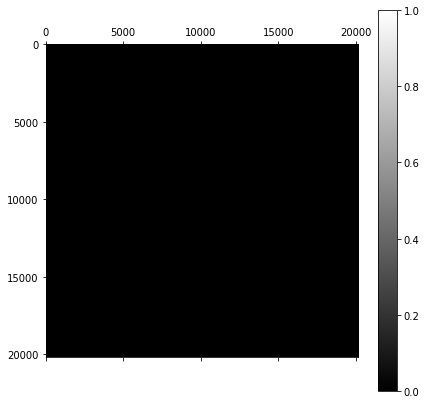

In [9]:
matrix_heatmap(network.get_adjacency_matrix(edge_types=["u"], node_list=network.nodes["GE"]).todense(),
              figsize=(7,7))

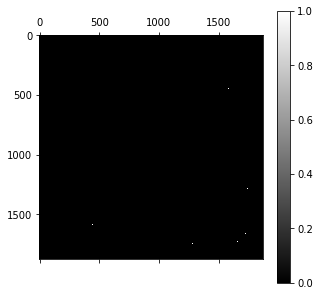

In [13]:
matrix_heatmap(network.get_adjacency_matrix(edge_types=["u"], node_list=network.nodes["MIR"]).todense(),
              figsize=(5,5))

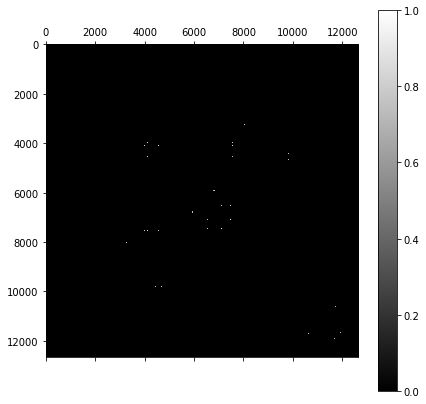

In [11]:
matrix_heatmap(network.get_adjacency_matrix(edge_types=["u"], node_list=network.nodes["LNC"]).todense(),
              figsize=(7,7))

In [9]:
network.G.number_of_edges()

400399

In [15]:
# WRITE Edgelist
nx.write_edgelist(network.get_subgraph(["MIR", "GE", "LNC"]), 
                  "moge/data/LMN_only_directed/affinity/lmn_n70_m70_l70-70_GO_Rfams_Disease_Family_affinity.edgelist", 
                  data=True)

In [6]:
# WRITE FULL network
import pickle
with open('moge/data/LMN_only_directed/lmn_n70_m70_l60-60_GO_Rfams_Disease_Family_LNCexp_full.pickle', 'rb') as file:
    network = pickle.load(file)

# Add Attribute Affinity NEGATIVE Edges between cross-modals

In [11]:
u_n_size = 10000
network.add_sampled_negative_edges(u_n_size, modalities=["GE", "MIR"])
network.add_sampled_negative_edges(u_n_size*2, modalities=["GE", "LNC"])
network.add_sampled_negative_edges(u_n_size, modalities=["LNC", "MIR"])

Number of negative sampled edges between ['GE', 'MIR'] added: 10000
Number of negative sampled edges between ['GE', 'LNC'] added: 20000
Number of negative sampled edges between ['LNC', 'MIR'] added: 10000


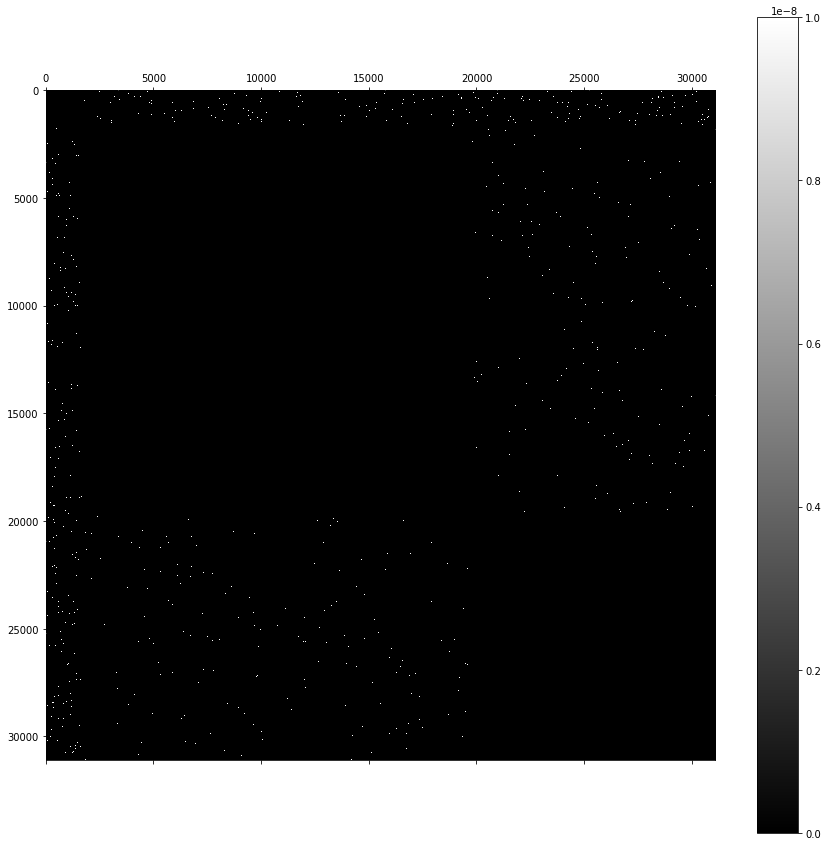

In [31]:
matrix_heatmap(network.get_adjacency_matrix(edge_types=["u_n"], node_list=network.node_list).todense(),
              figsize=(15,15))

# Add Regulatory Interaction edges

In [16]:
# Adds miRNA-target interaction network
network.add_directed_edges_from_edgelist(edgelist=luad_data.MIR.get_miRTarBase_miRNA_target_interaction(), 
                                        modalities=["MIR", "GE"], correlation_weights=False, threshold=0.20,
                                        database="miRTarBase")

Adding edgelist with 1759 total unique MIR genes (source), but only matching 1618 nodes
Adding edgelist with 15064 total unique GE genes (target), but only matching 14666 nodes
377318 edges added.


In [17]:
# Adds Gene Regulatory Network edges
network.add_directed_edges_from_edgelist(edgelist=luad_data.GE.get_starBase_RNA_RNA_interactions(), # unweighted edges
                                        modalities=["GE", "GE"], correlation_weights=False, threshold=0.2,
                                        database="starBase")

Adding edgelist with 12671 total unique GE genes (source), but only matching 12587 nodes
Adding edgelist with 17752 total unique GE genes (target), but only matching 8844 nodes
163999 edges added.


In [18]:
# Adds miRNA-lncRNA interaction network
# network.add_directed_edges_from_edgelist(edgelist=luad_data.LNC.get_starBase_lncRNA_miRNA_interactions_edgelist(),
#                                         )
network.add_directed_edges_from_edgelist(edgelist=luad_data.LNC.get_lncRNome_miRNA_binding_sites_edgelist(),
                                         modalities=["LNC", "MIR"], correlation_weights=False, threshold=0.20,
                                        database="lncRNome")

network.add_directed_edges_from_edgelist(edgelist=luad_data.LNC.get_lncBase_miRNA_lncRNA_interactions_edgelist(),
                                         modalities=["MIR", "LNC"], correlation_weights=False, threshold=0.20,
                                        database="lncBase")

network.add_directed_edges_from_edgelist(edgelist=luad_data.LNC.get_LncReg_lncRNA_RNA_regulatory_interactions(),
                                         modalities=["LNC", "GE"], correlation_weights=False, threshold=0.20,
                                        database="LncReg")

Adding edgelist with 66 total unique LNC genes (source), but only matching 26 nodes
Adding edgelist with 978 total unique MIR genes (target), but only matching 893 nodes
2375 edges added.
Adding edgelist with 702 total unique MIR genes (source), but only matching 631 nodes
Adding edgelist with 6185 total unique LNC genes (target), but only matching 2530 nodes
53926 edges added.
Adding edgelist with 137 total unique LNC genes (source), but only matching 21 nodes
Adding edgelist with 373 total unique GE genes (target), but only matching 174 nodes
554 edges added.


# Filter the node_list

In [19]:
isolates = list(nx.isolates(network.G))

In [20]:
network.nodes["GE"] = [node for node in network.nodes["GE"] if node not in isolates]
network.nodes["LNC"] = [node for node in network.nodes["LNC"] if node not in isolates]
network.nodes["MIR"] = [node for node in network.nodes["MIR"] if node not in isolates]
network.node_list = [node for node in network.node_list if node not in isolates]

In [21]:
# network.remove_extra_nodes() # Also makes network unmutable

In [22]:
network.G.number_of_nodes()

46078

In [19]:
len(network.node_list)

30178

In [12]:
# WRITE FULL network
# import pickle
# with open('moge/data/LMN_only_directed/lmn_starBase_lncBase_miRTarBase_LncReg_lncRNome_full.pickle', 'wb') as file:
#     pickle.dump(network, file)

# Split train-test by edges

In [1]:
import pickle
with open('moge/data/LMN_only_directed/lmn_starBase_lncBase_miRTarBase_LncReg_lncRNome_full.pickle', 'rb') as file:
    network = pickle.load(file)

In [23]:
from moge.evaluation.utils import split_train_test_edges

network_train, test_edges, val_edges = split_train_test_edges(network, network.node_list, 
#                                                                            databases=,
                                                          test_frac=.00, val_frac=.20, edge_types=["d"], 
                                                          seed=0, verbose=True)

preprocessing...
edges_to_remove 353672
mst_edges 18083
edges_to_remove (after MST) 353672
test_edges_size 0
val_edges_size 70734
Removed 0 test, and 70734 val, type ['d'] edges


In [24]:
from moge.network.heterogeneous_network import HeterogeneousNetwork

network_test = HeterogeneousNetwork(modalities=["MIR", "GE", "LNC"], multi_omics_data=network.multi_omics_data)
network_val = HeterogeneousNetwork(modalities=["MIR", "GE", "LNC"], multi_omics_data=network.multi_omics_data)
network_test.G.add_edges_from(test_edges)
network_val.G.add_edges_from(val_edges)

MIR  nodes: 1870
GE  nodes: 20163
LNC  nodes: 12644
Total nodes: 34677
Genes info columns: ['locus_type', 'Transcript sequence', 'Disease association', 'Family']
Number of nodes without seq removed: 2145
Total nodes (filtered): 32533
MIR  nodes: 1870
GE  nodes: 20163
LNC  nodes: 12644
Total nodes: 34677
Genes info columns: ['locus_type', 'Transcript sequence', 'Disease association', 'Family']
Number of nodes without seq removed: 2145
Total nodes (filtered): 32533


# Split train-test by nodes

In [18]:
from moge.evaluation.utils import split_train_test_nodes

network_train, test_edges, val_edges, test_nodes, val_nodes = split_train_test_nodes(network, network.nodes["LNC"],
                                                          test_frac=.00, val_frac=.10, edge_types=["d"], 
                                                          seed=0, verbose=True)

preprocessing...
removed 135945 edges, and  1129 nodes.
validation edges 59775
test edges 0


In [21]:
val_nodes

['hsa-mir-6125',
 'hsa-mir-432',
 'hsa-mir-296',
 'hsa-mir-4509-1',
 'hsa-mir-5094',
 'hsa-mir-411',
 'hsa-mir-545',
 'hsa-mir-527',
 'hsa-mir-4513',
 'hsa-mir-218-2',
 'hsa-mir-298',
 'hsa-mir-4447',
 'hsa-mir-4435-1',
 'hsa-mir-3941',
 'hsa-mir-4306',
 'hsa-mir-7853',
 'hsa-mir-6727',
 'hsa-mir-362',
 'hsa-mir-587',
 'hsa-mir-891a',
 'hsa-mir-662',
 'hsa-mir-3199-1',
 'hsa-mir-4728',
 'hsa-mir-645',
 'hsa-mir-6767',
 'hsa-mir-5092',
 'hsa-mir-551a',
 'hsa-mir-876',
 'hsa-mir-2861',
 'hsa-mir-4747',
 'hsa-mir-26b',
 'hsa-mir-1538',
 'hsa-mir-4311',
 'hsa-mir-618',
 'hsa-mir-1256',
 'hsa-mir-3907',
 'hsa-mir-599',
 'hsa-mir-6859-1',
 'hsa-mir-34a',
 'hsa-mir-495',
 'hsa-mir-3660',
 'hsa-mir-3619',
 'hsa-mir-548v',
 'hsa-mir-550b-1',
 'hsa-mir-3119-1',
 'hsa-mir-548h-1',
 'hsa-mir-4280',
 'hsa-mir-5692c-1',
 'hsa-mir-4653',
 'hsa-mir-5699',
 'hsa-mir-33b',
 'hsa-mir-181c',
 'hsa-mir-3662',
 'hsa-mir-3648',
 'hsa-mir-26a-1',
 'hsa-mir-4680',
 'hsa-mir-4515',
 'hsa-mir-200a',
 'hsa-mir-67

In [19]:
from moge.network.heterogeneous_network import HeterogeneousNetwork

network_test = HeterogeneousNetwork(modalities=["MIR", "GE", "LNC"], multi_omics_data=network.multi_omics_data)
network_val = HeterogeneousNetwork(modalities=["MIR", "GE", "LNC"], multi_omics_data=network.multi_omics_data)
network_test.val_node_list = test_nodes
network_val.val_node_list = val_nodes
network_test.G.add_edges_from(test_edges)
network_val.G.add_edges_from(val_edges)
len(network_test.node_list), len(network_val.node_list)

MIR  nodes: 1870
GE  nodes: 20163
LNC  nodes: 12644
Total nodes: 34677
Genes info columns: ['locus_type', 'Family', 'Transcript sequence', 'Disease association']
Number of nodes without seq removed: 2145
Total nodes (filtered): 32533
MIR  nodes: 1870
GE  nodes: 20163
LNC  nodes: 12644
Total nodes: 34677
Genes info columns: ['locus_type', 'Family', 'Transcript sequence', 'Disease association']
Number of nodes without seq removed: 2145
Total nodes (filtered): 32533


(32532, 32532)

In [29]:
network_train.G.number_of_edges()

1996434

# Write train-test-val split as separate networks

In [25]:
# WRITE
import pickle
with open('moge/data/LMN_only_directed/lmn_edges10/lmn_edges10_train.pickle', 'wb') as file:
    pickle.dump(network_train, file)
    
with open('moge/data/LMN_only_directed/lmn_edges10/lmn_edges10_test.pickle', 'wb') as file:
    pickle.dump(network_test, file)
    
with open('moge/data/LMN_only_directed/lmn_edges10/lmn_edges10_val.pickle', 'wb') as file:
    pickle.dump(network_val, file)

PicklingError: Can't pickle <class 'moge.network.heterogeneous_network.HeterogeneousNetwork'>: it's not the same object as moge.network.heterogeneous_network.HeterogeneousNetwork

In [ ]:
# WRITE Edgelist
nx.write_edgelist(network_train.get_subgraph(["MIR", "GE", "LNC"]), 
                  "moge/data/LMN_only_directed/lmn_edges10/lmn_edges10_train.edgelist", 
                  data=False)

In [24]:
# import pickle
# with open('moge/data/LMN_only_directed/lmn_miRTarBase_edges10_train.pickle', 'rb') as file:
#     network = pickle.load(file)

# WRITE Edgelist
nx.write_edgelist(network.get_subgraph(["GE"]), 
                  "moge/data/LMN_only_directed/lmn_starBaseFull_GE_edges50_train.edgelist", 
                  data=False)

## Network Info & Visualizations

In [22]:
print(len(network.G.nodes()))
print(len(network.G.edges()))

33120
1243116


In [23]:
csr_un = network.get_adjacency_matrix(edge_types=["u_n"], node_list=network.node_list)
csr_u = network.get_adjacency_matrix(edge_types=["u"], node_list=network.node_list)
csr_d = network.get_adjacency_matrix(edge_types=["d"], node_list=network.node_list)

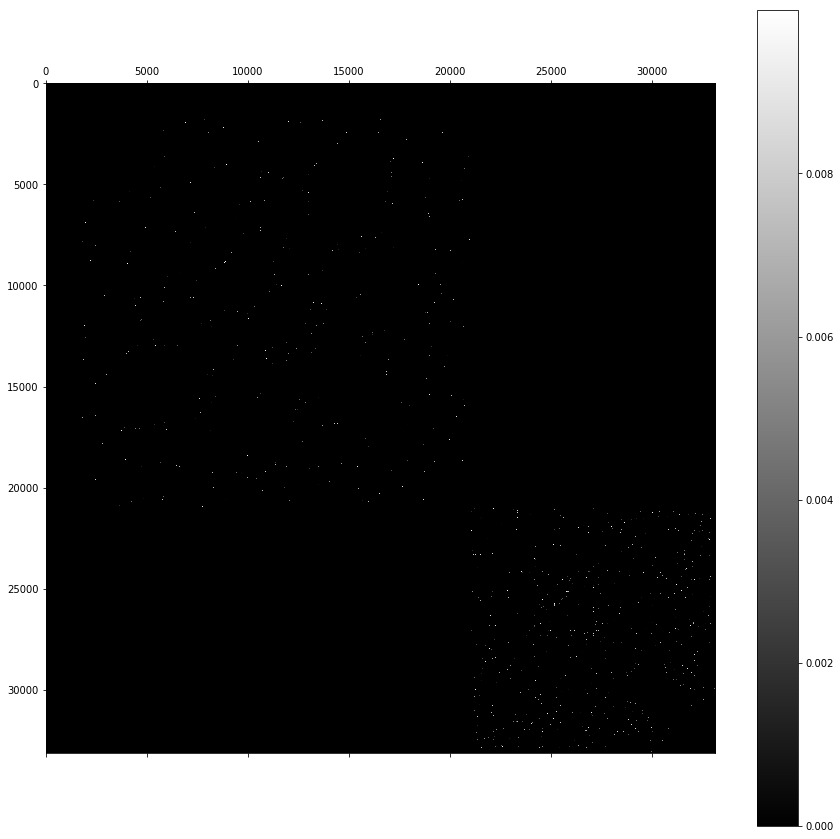

In [24]:
matrix_heatmap(csr_un.toarray())

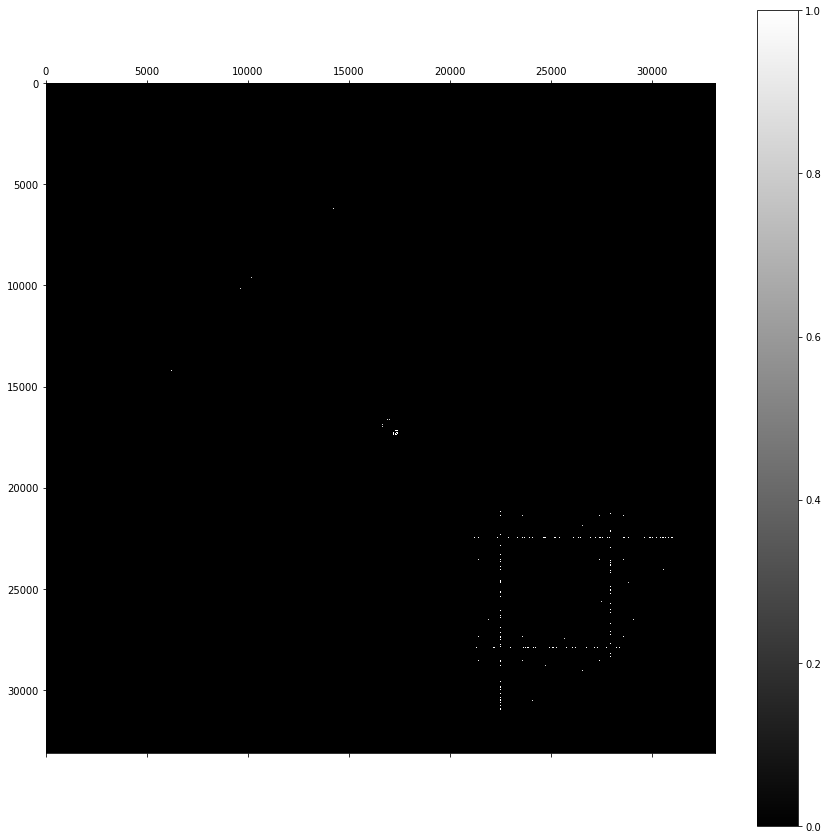

In [25]:
matrix_heatmap(csr_u.toarray())

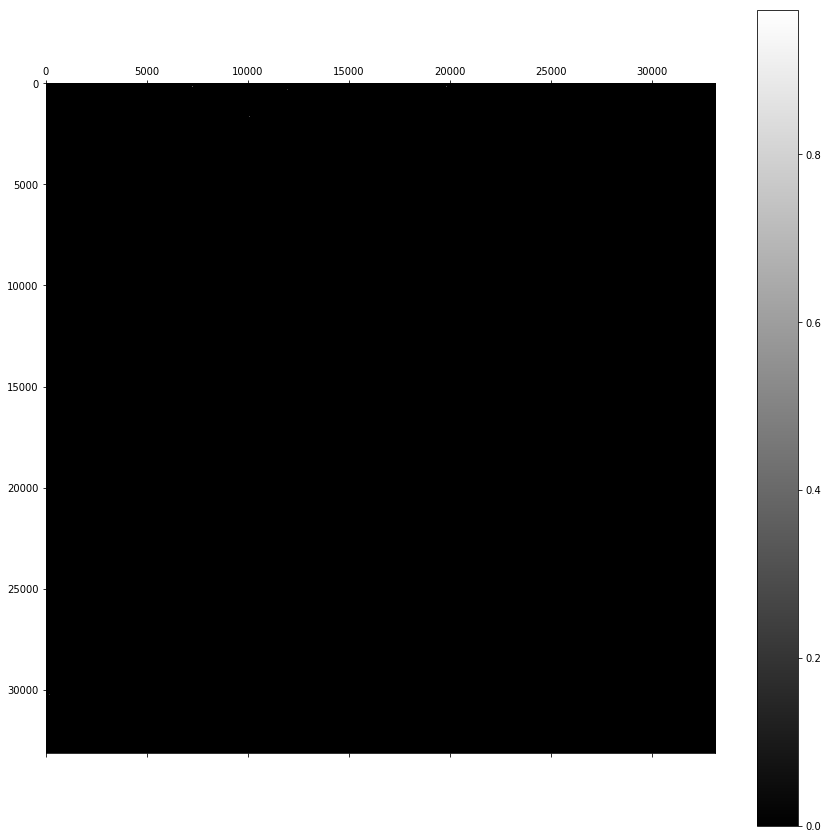

In [26]:
matrix_heatmap(csr_d.toarray())